# Estimating Likelihood with Logisitic Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn import cross_validation, feature_selection,preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from patsy import dmatrices


### Titanic Data

We are going to use the Titanic data that we utilized in chapter 3 for data mining. Following is the description of the columns

VARIABLE DESCRIPTIONS:
* <b>survival</b>        Survival (0 = No; 1 = Yes)
* <b>pclass</b>          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* <b>name</b>            Name
* <b>sex</b>             Sex
* <b>age</b>             Age
* <b>sibsp</b>           Number of Siblings/Spouses Aboard
* <b>parch</b>           Number of Parents/Children Aboard
* <b>ticket</b>          Ticket Number
* <b>fare</b>            Passenger Fare
* <b>cabin</b>           Cabin
* <b>embarked</b>        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


### Inputting the data 

In [3]:
df = pd.read_csv('/home/s6413/MasteringDataScience/titanic data.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Counting the missing values in each column

In [4]:
df.count(0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Understanding the field descriptions of the data and seeing the missing value of the data. We can see that Ticket and Cabin column won't add much value to the model building process as the ticket column is basically unique identifier for each passenger and the Cabin column is mostly empty.

We'll remove these two columns from our dataframe

In [5]:
df = df.drop(['Ticket','Cabin','Name'], axis=1)

# Remove missing values
df = df.dropna() 

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C
10,11,1,3,female,4.0,1,1,16.7000,S


## Model Building

Let's split the into training and testing set

In [6]:

df_train = df.iloc[ 0: 600, : ]
df_test = df.iloc[ 600: , : ]



Let's build a logisitc regression model using statsmodel

In [7]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked) +  Parch' 

y_train,x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test, return_type='dataframe')

# instantiate our model
model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()


Optimization terminated successfully.
         Current function value: 0.450031
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            8
Date:                Sun, 04 Dec 2016   Pseudo R-squ.:                  0.3333
Time:                        18:47:53   Log-Likelihood:                -270.02
converged:                       True   LL-Null:                       -404.99
                                        LLR p-value:                 1.009e-53
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.3332      0.510      8.490      0.000         3.333     5.334
C(Pclass)[T.2]      -1.2030      0.325     -3.703      0.000        -1.840    -0.566
C(Pclass)[T.3]      -2.4673      0.320     -7.705      0.000        -3.095    -1.840
C(Sex)[T.male]      -2.6312      0.244    -10.797      0.000        -3.109    -2.154
C(Embarked)[T.Q]    -0.4359      0.647     -0.674      0.501        -1.704     0.832
C(Embarked)[T.S]    -0.2910      0.297     -0.980      0.327        -0.873     0.291
Age                 -0.0397      0.009     -4.464      0.000        -0.057    -0.022
SibSp               -0.3202      0.136     -2.354      0.019        -0.587    -0.054
Parch               -0.1420      0.136     -1.041      0.298        -0.409     0.125
====================================================================================
"""

Based on the significant variables, let's remodel it

In [8]:
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp ' 

y_train,x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test, return_type='dataframe')

# instantiate our model
model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()


Optimization terminated successfully.
         Current function value: 0.451793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            5
Date:                Sun, 04 Dec 2016   Pseudo R-squ.:                  0.3307
Time:                        18:47:54   Log-Likelihood:                -271.08
converged:                       True   LL-Null:                       -404.99
                                        LLR p-value:                 8.172e-56
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          4.1050      0.479      8.575      0.000         3.167     5.043
C(Pclass)[T.2]    -1.2971      0.306     -4.242      0.000        -1.896    -0.698
C(Pclass)[T.3]    -2.5739      0.305     -8.433      0.000        -3.172    -1.976
C(Sex)[T.male]    -2.5808      0.235    -10.996      0.000        -3.041    -2.121
Age               -0.0401      0.009     -4.549      0.000        -0.057    -0.023
SibSp             -0.3691      0.130     -2.840      0.005        -0.624    -0.114
==================================================================================
"""

Lets see prediction distribution 

/root/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


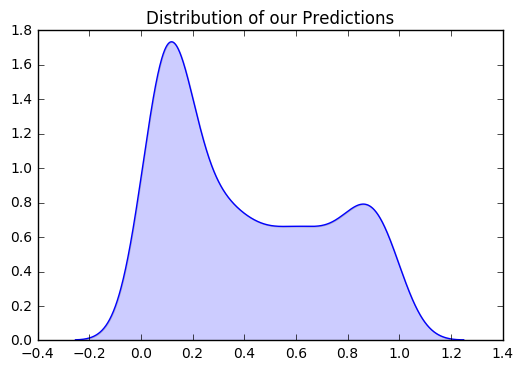

In [9]:
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribution of our Predictions")

Distribution of prediction based on the Gender

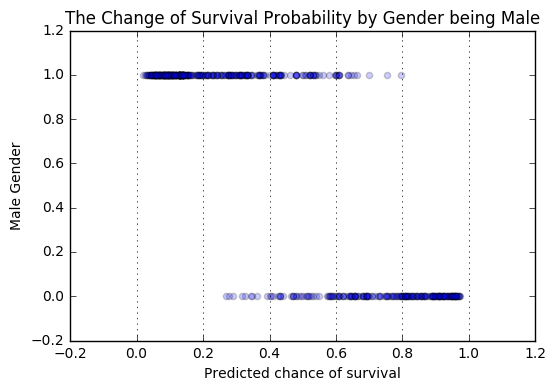

In [10]:
plt.scatter(res.predict(),x_train['C(Sex)[T.male]'] , alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Male Gender")
plt.title("The Change of Survival Probability by Gender being Male")

Distribution of the prediction based on the lower class

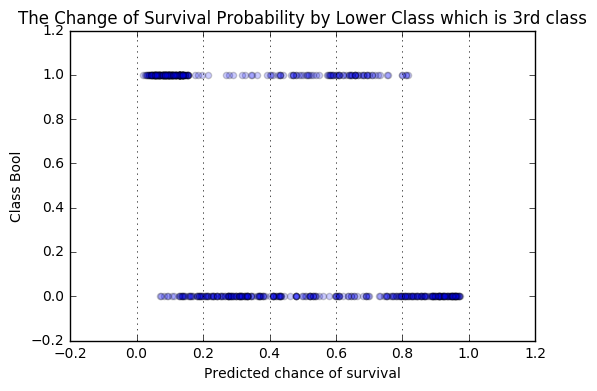

In [11]:
plt.scatter(res.predict(),x_train['C(Pclass)[T.3]'] , alpha=0.2)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool")
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class which is 3rd class")

Distribution of prediction based on Age

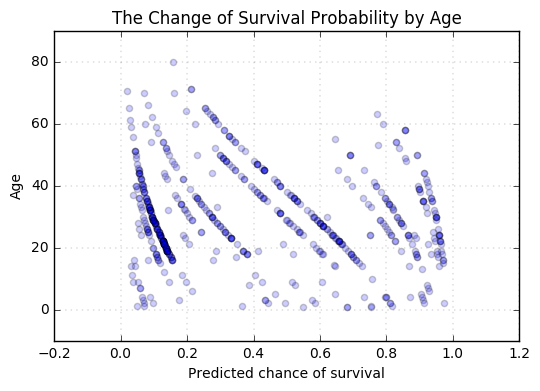

In [12]:
plt.scatter(res.predict(),x_train.Age , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

Distribution of prediction based on number of siblings

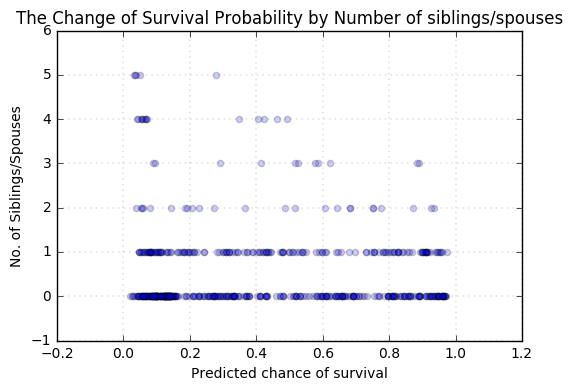

In [13]:
plt.scatter(res.predict(),x_train.SibSp , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Number of siblings/spouses")
plt.xlabel("Predicted chance of survival")
plt.ylabel("No. of Siblings/Spouses")

Let's predict using the model on the test data  and see how is the performance of the model throught the precision and recall by keeping a threshold of 0.7

In [16]:
y_pred = res.predict(x_test)
y_pred_flag = y_pred > 0.7
print(pd.crosstab(y_test.Survived
                  ,y_pred_flag
                  ,rownames = ['Actual']
                  ,colnames = ['Predicted']))

print('\n \n')

print(classification_report(y_test,y_pred_flag))

Predicted  False  True 
Actual                 
0.0           67      0
1.0           21     24

 

             precision    recall  f1-score   support

        0.0       0.76      1.00      0.86        67
        1.0       1.00      0.53      0.70        45

avg / total       0.86      0.81      0.80       112



Let's compute the receiver operating characteristics

In [182]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.879934


Let's plot the roc curve

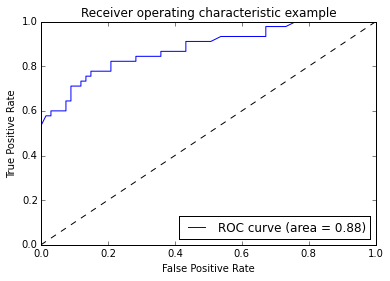

In [183]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Let's build the same model using scikit 

In [188]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x_train, y_train.Survived)


In [185]:
# examine the coefficients
pd.DataFrame(zip(x_train.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[1.67901054914]
1,C(Pclass)[T.2],[-0.941153862481]
2,C(Pclass)[T.3],[-2.13935207654]
3,C(Sex)[T.male],[-2.34378496065]
4,Age,[-0.0314323464392]
5,SibSp,[-0.297688747773]


Let's check out the precision and recall for it

In [206]:
y_pred = model.predict_proba(x_test)
y_pred_flag = y_pred[:,1] > 0.7


print pd.crosstab(y_test.Survived
                  ,y_pred_flag
                  ,rownames = ['Actual']
                  ,colnames = ['Predicted'])

print '\n \n'

print classification_report(y_test,y_pred_flag)

Predicted  False  True 
Actual                 
0             67      0
1             23     22

 

             precision    recall  f1-score   support

        0.0       0.74      1.00      0.85        67
        1.0       1.00      0.49      0.66        45

avg / total       0.85      0.79      0.77       112



Let's compute the roc curve

In [207]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.878275


Let's plot the roc curve

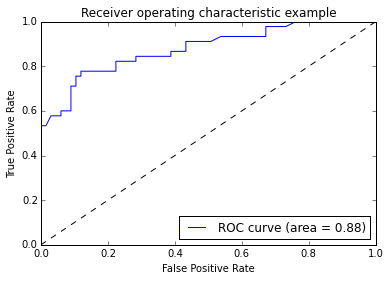

In [208]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()